#Rede Neural Convolucional - AULA 01
Conceitos

MLP :  Número de  neurônios na camada anterior e  número na camada atual dará as conexões pela multiplicação, chamadas de pesos.
     - SÓ ACEITA ENTRDAS DE 1D, LINEARLIZAR A IMAGEM
     - A PROXIMA CAMADA DEVE SER DIRETAMENTE PROPORCIONAL
     - POR UM ALTO CUSTO PARA ARAMZENAR A PENAS A IMAGAME O MLÇP NÃO SERÁ USADO.
Convolução (CNN) :
                  - O Númerto de parametros da rede não é mais vinculado ao tamanho da entrada
                  - interpreta a imagem de forma mais intuitiva
                  -

# ARQUITETURA DA CNN
- TRABALHA COM VOLUMES 3D(ALTURA, LARGURA E PROFUNDIDADE)

- PROFUNDIDDAE : Canais de cor, mapa de características.
- Neuronios(3D) : possuem campo de visão limitado.
- CNN alterna em transformação e subamostragem.
- Camadas comuns : Convolucional(conv), Polling(Poll), Totalmente Concetada(FC).
- Aprendizado hierarquico





In [2]:
#Datasets
import matplotlib.pyplot as plt
from matplotlib import patches
import numpy as np

import torch
from torchvision import datasets, transforms


In [3]:
#dataset MINIST de digitos escritos a mão para reconhecimento do padrão em imagens, será dado por um dado, rotulo
MNIST = datasets.MNIST('.',train=False,
                       transform=transforms.ToTensor(),
                        download=True)


100%|██████████| 9912422/9912422 [00:00<00:00, 262304016.63it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 22206360.00it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 151236445.07it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 22333562.45it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [4]:
dado, rotulo = MNIST[0]
print(type(dado), type(rotulo))

<class 'torch.Tensor'> <class 'int'>


#plot de amostras do dataset

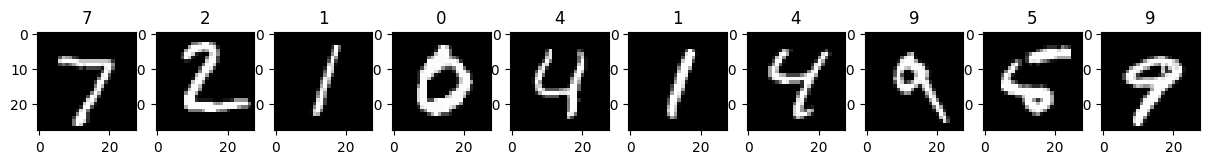

In [5]:
fig, axs = plt.subplots(1,10,figsize=(15,4))
for i in range(10):
  dado, rotulo = MNIST[i]
  axs[i].imshow(dado[0],cmap='gray')
  axs[i].set_title(str(rotulo))

A ultima camada deve ser uma de mlp conectada com a anterior cada cada digito

#Detecção
- Uso do dataset PascalVOC2012

In [6]:
VOC = datasets.VOCDetection('.',image_set='train', download=True,transform=transforms.ToTensor(),)

100%|██████████| 1999639040/1999639040 [01:54<00:00, 17518434.35it/s]


Extracting ./VOCtrainval_11-May-2012.tar to .


observar o tipo

<class 'torch.Tensor'> <class 'dict'>
torch.Size([3, 442, 500])


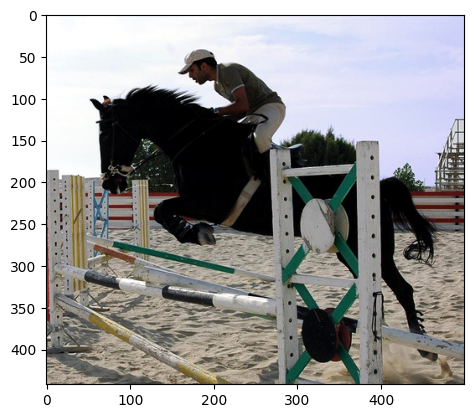

In [7]:
dado, rotulo = VOC[0]
print(type(dado), type(rotulo))
print(dado.size()) # indica que [canais de cor, tamanhox tamanho]
#obs: para as bibliotecas de vizualização muda, a utlima dimensão indica os canais de cores
dado= dado.permute(1,2,0)
plt.imshow(dado)
 # dicionario o rotulo



In [8]:
rotulo

{'annotation': {'folder': 'VOC2012',
  'filename': '2008_000008.jpg',
  'source': {'database': 'The VOC2008 Database',
   'annotation': 'PASCAL VOC2008',
   'image': 'flickr'},
  'size': {'width': '500', 'height': '442', 'depth': '3'},
  'segmented': '0',
  'object': [{'name': 'horse',
    'pose': 'Left',
    'truncated': '0',
    'occluded': '1',
    'bndbox': {'xmin': '53', 'ymin': '87', 'xmax': '471', 'ymax': '420'},
    'difficult': '0'},
   {'name': 'person',
    'pose': 'Unspecified',
    'truncated': '1',
    'occluded': '0',
    'bndbox': {'xmin': '158', 'ymin': '44', 'xmax': '289', 'ymax': '167'},
    'difficult': '0'}]}}

#PLOT DO RETANGULO

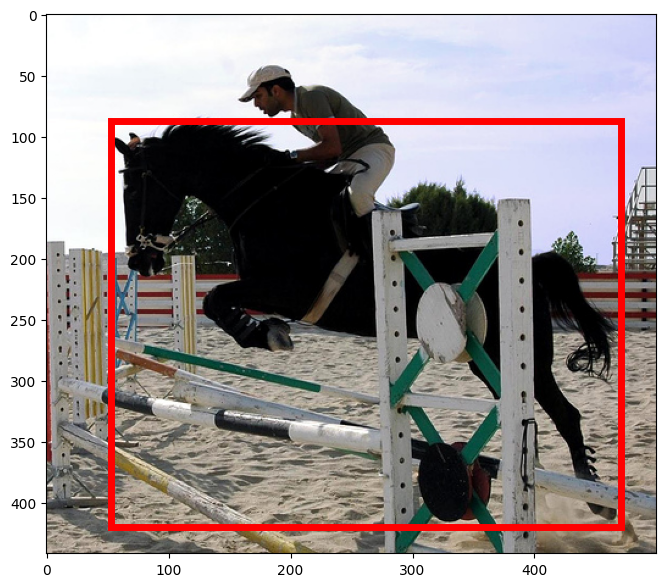

In [9]:
bbox = rotulo['annotation']['object'][0]['bndbox']
xmax = int(bbox['xmax'])
xmin = int(bbox['xmin'])
ymax = int(bbox['ymax'])
ymin = int(bbox['ymin'])

fig, ax = plt.subplots(figsize=(8, 7))
plt.imshow(dado)

rect = patches.Rectangle((xmin, ymin), xmax-xmin , ymax-ymin, fill=False, linewidth=5, edgecolor='r')
ax.add_patch(rect)

plt.show()

# Como deve ser a camada de uam rede cujo objetivo é detectar os objetos
- Problema de regressão, 4 neuronios para identificar o xmin,xmax,ymin,ymax.


#Segmentação
- Definir a pix a pix a região que está aquele obejto, uma rotulação densa com mais detalhes

In [11]:
VOCs = datasets.VOCSegmentation('.',year='2012',
                                image_set='val',
                                download=False,
                                transform= transforms.ToTensor(),
                                target_transform=transforms.ToTensor())

In [12]:
dado, rotulo = VOCs[0]
print(type(dado), type(rotulo))
print(dado.size(), rotulo.size())

<class 'torch.Tensor'> <class 'torch.Tensor'>
torch.Size([3, 366, 500]) torch.Size([1, 366, 500])


#Plotar imagem e mapa de segmentação

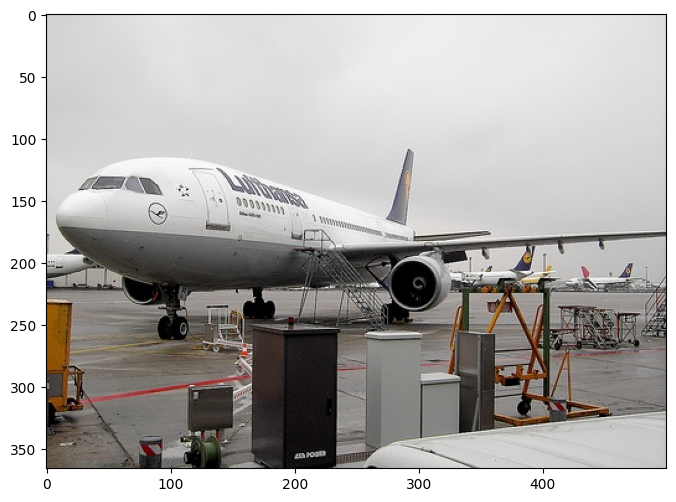

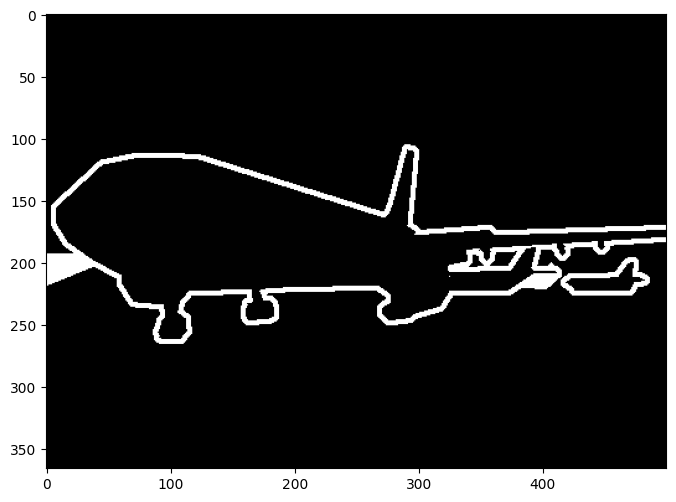

In [14]:
dado= dado.permute(1,2,0) #SEGUIR A MENCIONADO ANTES SOBRE
                          #AS CORES NO TORCHVISION E NO MATPLOT QUE PRECISA MUDAR
plt.figure(figsize=(8,6))
plt.imshow(dado) # plotar a imagem normal

plt.figure(figsize=(8,6)) #plotar a imagem de segmentação
plt.imshow(rotulo[0], cmap='gray')

